# Tarea N°3

### César Cerda Bollmann

In [1]:
install.packages('tidyr')
install.packages('ggplot2')
install.packages('data.table')

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘generics’, ‘dplyr’, ‘tidyselect’


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘colorspace’, ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘viridisLite’, ‘gtable’, ‘isoband’, ‘scales’


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [2]:
library(purrr)
library(ggplot2)
library(data.table)


Attaching package: ‘data.table’


The following object is masked from ‘package:purrr’:

    transpose




## Pregunta N°1

### a) Gráfico la función densidad

In [3]:
x=seq(-10,10,0.1)
y=1:length(x)
for (i in 1:length(x)) {
    if (x[i]<0){
        y[i]=0.5*exp(x[i])
    } else if(x[i]>=0) {     
        y[i]=0.5*exp(-x[i])
    }
}

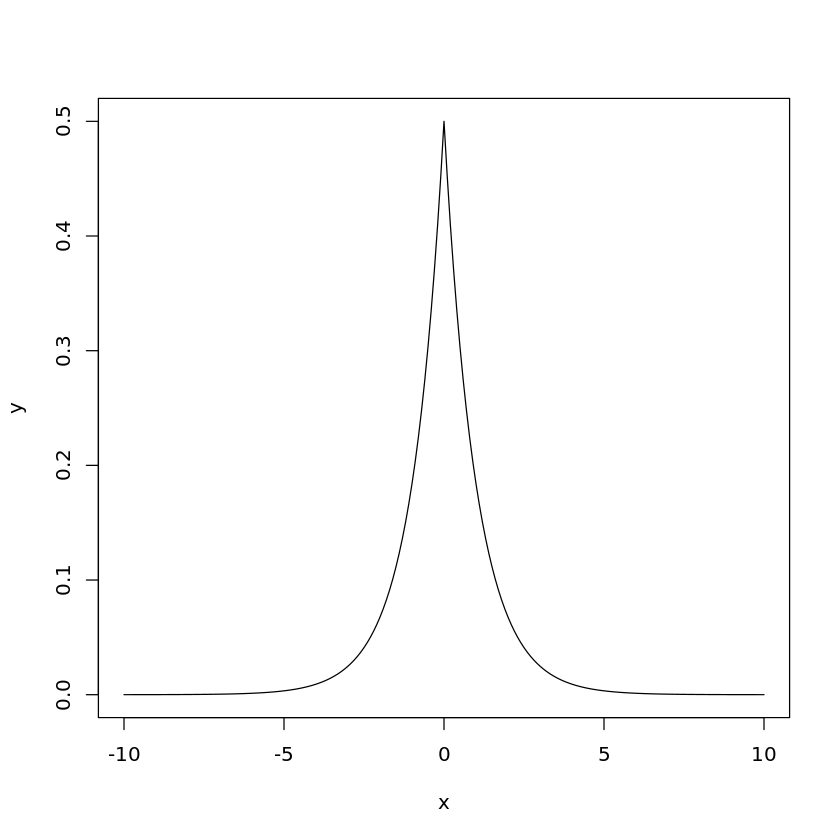

In [4]:
plot(x,y,type='l')

### b) Calcule y grafique la función distribución acumulada F(x)

In [5]:
X = seq(-10,10,0.1)
F = 1:length(X)
for (i in 1:length(X)){
    if (X[i]<0){
        F[i] = 0.5*exp(X[i])
        }
    if (X[i]>=0){
        F[i]= 1- 0.5*exp(-X[i])
        }
    }

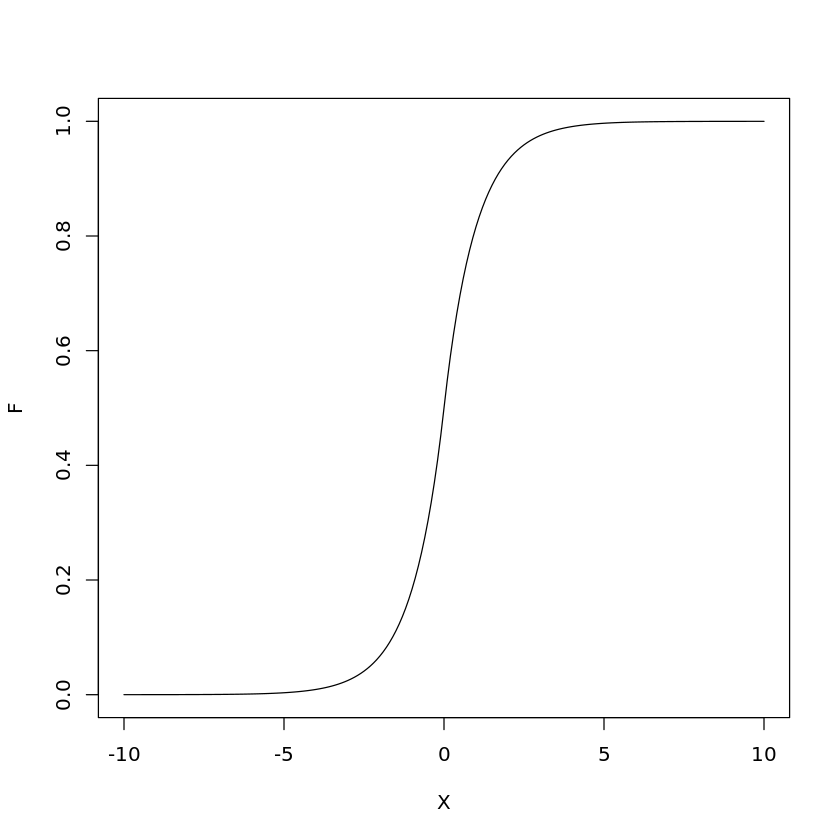

In [6]:
plot(X,F,type='l')

### c) Utilizando el método de la transformada inversa, genere 1000 muestras de la distribución dada por F.

In [26]:
set.seed(1234)
sample_uniform = runif(1000, 0, 1)

In [27]:
sample_F = 1:length(sample_uniform)
for (i in 1:length(sample_uniform)){
    if (sample_uniform[i]<0.5){
        sample_F[i] = log(2*sample_uniform[i])
        }
    if (sample_uniform[i]>=0.5){
        sample_F[i]= -log(2-2*sample_uniform[i])
        }
    }

In [28]:
sample_F_data = data.frame(sample_F)

In [29]:
sample_F_data['sample_F']

sample_F
<dbl>
-1.48101470
0.28050629
0.24660343
0.28336989
1.27952560
0.32936723
-3.96376310
-0.76550067
0.40371791


### d) Muestre un histograma de las muestras generadas, y grafique la distribución empírica acumulada correspondiente. Sobreponga ese gráfico con el gráfico de la función calculada en (b).

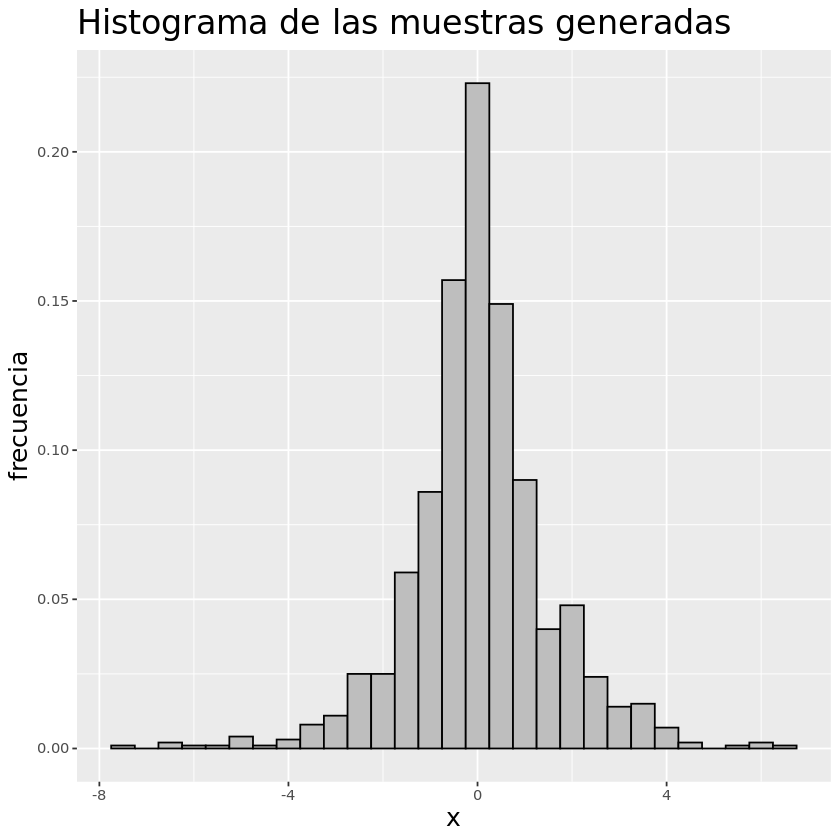

In [30]:
bin <- 0.5
plotfig <- ggplot(sample_F_data,aes(sample_F))+
        theme(plot.title = element_text(size = 20),
              axis.title.y=element_text(size = 15),
              axis.title.x=element_text(size = 15))
 
p <- plotfig+geom_histogram(aes(y = after_stat(count /(sum(count)))), binwidth=bin, color="black", fill="gray")+
       labs(x="x",
            y="frecuencia",
            title=paste0("Histograma de las muestras generadas"))

#p <- p+ geom_vline(aes(xintercept=mean(PT)),
#            color="blue", linetype="dashed", size=1)
           
p 

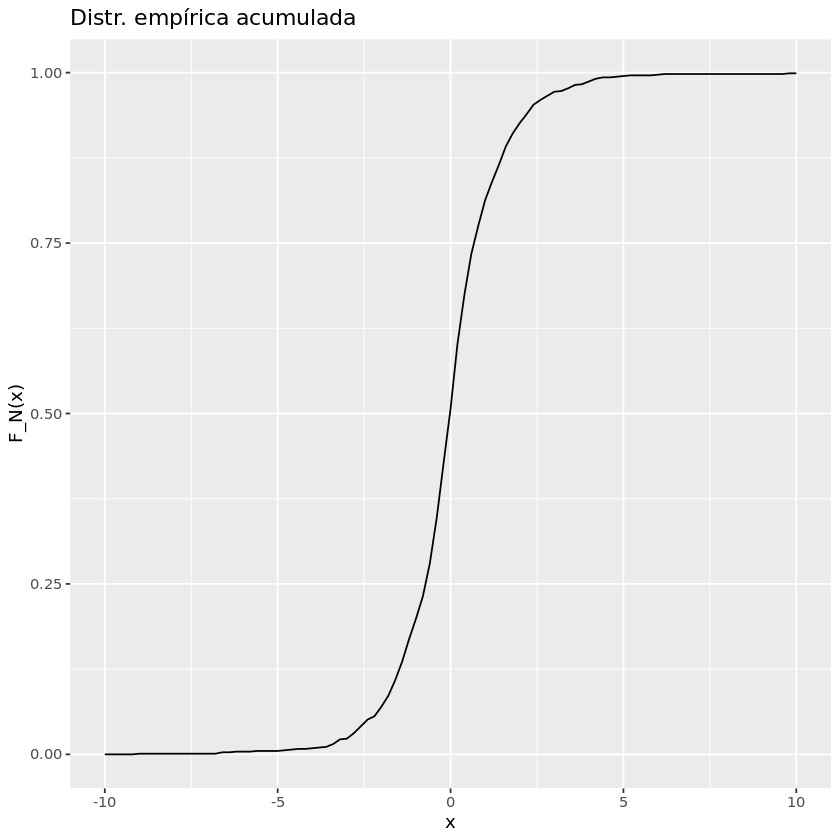

In [13]:
pfin2 = ggplot(sample_F_data,aes(sample_F))+geom_function(fun=ecdf(sample_F))+
         xlim(-10,10)+
         labs(x="x",y="F_N(x)",
              title=paste0("Distr. empírica acumulada")) 
pfin2

In [31]:
F_dist = function(x) {ifelse(x<0, 0.5*exp(x),1- 0.5*exp(-x))}

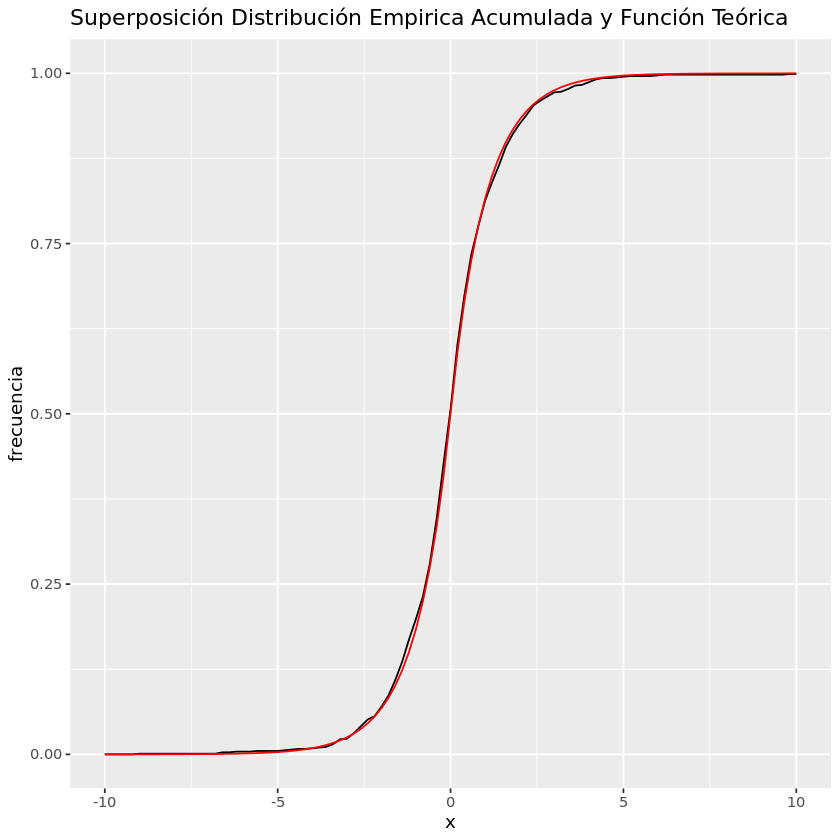

In [33]:
pfin3 = pfin2 + stat_function(fun = F_dist, color="red")+
       labs(x="x",
            y="frecuencia",
            title=paste0("Superposición Distribución Empirica Acumulada y Función Teórica"))
pfin3

#### e) Determine una distribución Normal que a usted le parezca la más cercana a los datos. Compare la curva la distribución acumulada de esa distribución Normal con las curvas generadas en (d). Qué se concluye?

Se calcula la media y la desviación estándar de la muestra, con estos parámentros se genera una distribución normal.  Se compara con el histograma de las muestras y se observa un buen ajuste

In [35]:
media =mean(sample_F)
media

[1] 0.0427919

In [36]:
stdrd =sd(sample_F)
stdrd

[1] 1.491287

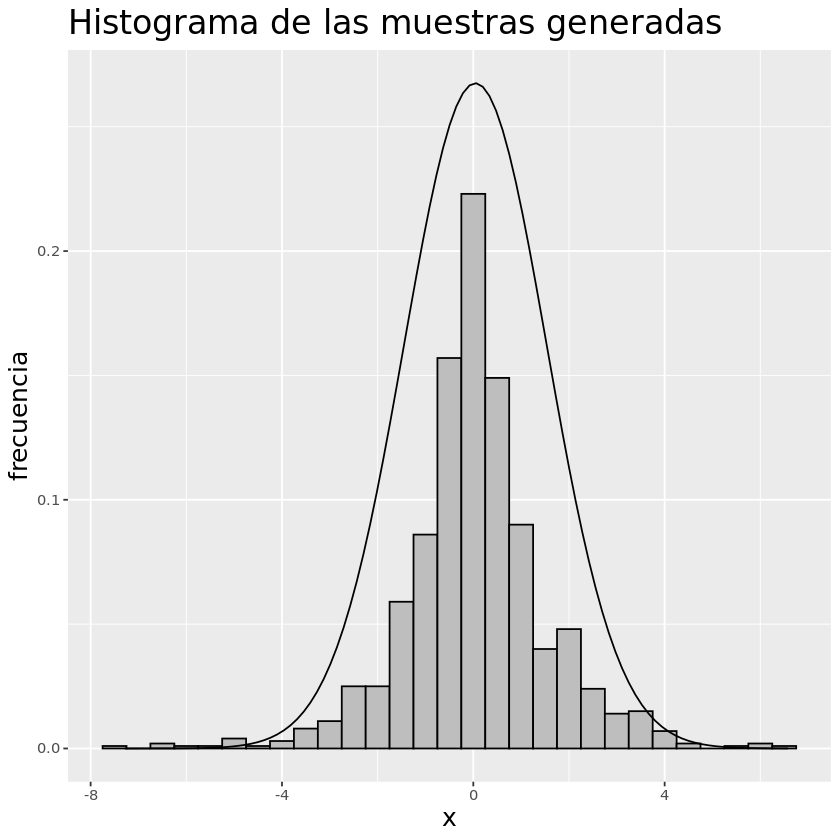

In [37]:
p+geom_function(fun = dnorm, args = list(mean = media, sd = stdrd))

Se superpone la distribución acumulada con las curvas en (d)

In [44]:
pfin4 =pfin3+stat_function(fun = pnorm, n = 1000, args = list(mean = media, sd = stdrd), color = "green")+labs(x="x",
            y="F_N(x)",
            title=paste0("Comparación Función Normal Acumulada y (d)"))

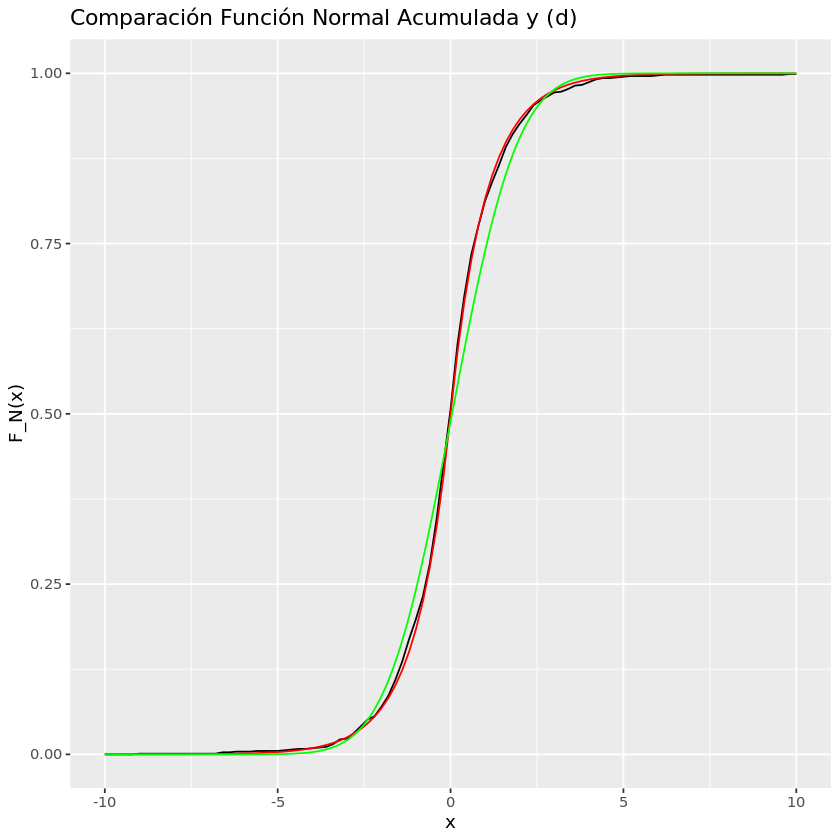

In [45]:
pfin4

## Pregunta N°2

#### a) Haga la comparación utilizando un test-t independiente. Calcule el valor-p. ¿Cuál política es mejor bajo ese test?

In [46]:
install.packages("readxl")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rematch’, ‘hms’, ‘cellranger’, ‘progress’




In [47]:
library(readxl)

#### Nos interesa evaluar cual política de inventario es mejor.  Para esto se plantea la siguiente hipótesis
#### Ho : u(400) >= u(300)
#### Ha : u(400) < u(300)

In [49]:
data = read_excel("data_independiente.xlsx")
data = as.data.frame(data)

In [50]:
dat400 = data$Ss_400
dat300 = data$Ss_300

In [52]:
data

Ss_400,Ss_300
<dbl>,<dbl>
127500,337200
448500,349500
243000,181500
40500,315000
367500,97500
102000,344100
306000,339900
274500,168000
216000,265500


Primero se verifica si las varianzas son iguales o distintas.  Para esto aplicamos test de Fisher

In [53]:
res.ftest = var.test(dat400, dat300, data = data)
res.ftest


	F test to compare two variances

data:  dat400 and dat300
F = 1.816, num df = 999, denom df = 999, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.604041 2.055892
sample estimates:
ratio of variances 
          1.815967 


#### p-value < 2.2e-16 < 0.05, por lo que no hay evidencia para decir que las varianzas son iguales.  Suponemos entonces que las varianzas son distintas

In [54]:
res = t.test(dat400, dat300, alternative = "less", var.equal = FALSE)
res


	Welch Two Sample t-test

data:  dat400 and dat300
t = 1.4015, df = 1843.2, p-value = 0.9194
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 15549.83
sample estimates:
mean of x mean of y 
   259524    252372 


#### como p-value = 0.9194, no existe evidencia para rechazar la hipótesis nula, por lo tanto la utilidad esperada es mayor con la política S=s=400

### b) Comparación utilizando un test-t pareado, aplicado a simulaciones independientes de las dos configuraciones

#### Nos interesa saber si la u(400)-u(300) >= 0.  Se genera la siguiente hipótesis:
#### Ho : u(400)-u(300) >= 0
#### Ha : u(400)-u(300) < 0

In [55]:
res_b = t.test(dat400, dat300, paired = TRUE,  alternative = "less")
res_b


	Paired t-test

data:  dat400 and dat300
t = 1.4107, df = 999, p-value = 0.9207
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 15498.74
sample estimates:
mean of the differences 
                   7152 


#### p-value = 0.9207 >0.05 por lo que no existe evidencia para rechazar la hipótesis nula.  Por tanto la utilidad esperada es mayor con la política S=s=400

### c) test-t pareado, aplicado a simulaciones generadas con los mismos números aleatorios

In [57]:
data_c = read_excel("ModeloP2(Demanda unica).xlsx", sheet = "Simulation Data Dump 1&2")
data_c = as.data.frame(data_c)

In [58]:
dat400c = data_c$Ss400
dat300c = data_c$Ss300

In [59]:
res_c = t.test(dat400c, dat300c, paired = TRUE,  alternative = "less")
res_c


	Paired t-test

data:  dat400c and dat300c
t = 18.209, df = 999, p-value = 1
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 32589.54
sample estimates:
mean of the differences 
                29887.2 


#### p-value = 1 >0.05 por lo que no existe evidencia para rechazar la hipótesis nula. Por tanto la utilidad esperada es mayor con la política S=s=400

## Pregunta N°3

### a) Cálculo de drift, volatilidad y gráfica superpuesta distribuciones empíricas y teóricas

In [3]:
stock_data = read.csv("prices4stocks.csv", sep=",")

In [4]:
summary(stock_data)

      Day               A               B               C         
 Min.   :  1.00   Min.   :28.28   Min.   :32.51   Min.   : 85.38  
 1st Qu.: 63.75   1st Qu.:30.96   1st Qu.:39.55   1st Qu.: 94.61  
 Median :126.50   Median :33.31   Median :44.99   Median :101.49  
 Mean   :126.50   Mean   :35.75   Mean   :44.95   Mean   :102.64  
 3rd Qu.:189.25   3rd Qu.:40.79   3rd Qu.:48.77   3rd Qu.:107.78  
 Max.   :252.00   Max.   :51.78   Max.   :61.97   Max.   :127.94  
       D        
 Min.   :48.12  
 1st Qu.:54.27  
 Median :67.01  
 Mean   :66.33  
 3rd Qu.:76.93  
 Max.   :94.10  

In [5]:
largo=length(stock_data$A)
largo

[1] 252

In [6]:
head(stock_data)

,Day,A,B,C,D
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,29.77,39.06,85.38,70.56
2,2,30.56,38.50,87.03,72.84
3,3,31.02,34.95,88.19,61.95
4,4,31.92,37.35,90.85,61.87
5,5,32.84,38.14,91.19,61.95
6,6,34.05,38.87,92.66,61.44


In [7]:
logA =c()
logB =c()
logC =c()
logD =c()

In [8]:
for (i in 1:largo){
    logA[i] = log(stock_data$A[i+1]/stock_data$A[i])
    logB[i] = log(stock_data$B[i+1]/stock_data$B[i])
    logC[i] = log(stock_data$C[i+1]/stock_data$C[i])
    logD[i] = log(stock_data$D[i+1]/stock_data$D[i])
    }

In [9]:
sd_A=sd(logA, na.rm=TRUE)
sd_B=sd(logB, na.rm=TRUE)
sd_C=sd(logC, na.rm=TRUE)
sd_D=sd(logD, na.rm=TRUE)

In [10]:
medA=mean(logA,na.rm=TRUE)
medB=mean(logB,na.rm=TRUE)
medC=mean(logC,na.rm=TRUE)
medD=mean(logD,na.rm=TRUE)

In [11]:
drift_A= medA+sd_A^2/2
drift_B= medB+sd_B^2/2
drift_C= medC+sd_C^2/2
drift_D= medD+sd_D^2/2

In [12]:
#Valores drift
drift_A
drift_B
drift_C
drift_D

[1] 0.002104436

[1] 0.001756885

[1] 0.001697626

[1] 0.00147115

In [13]:
#Valores Volatilidad
sd_A
sd_B
sd_C
sd_D

[1] 0.02536711

[1] 0.03314376

[1] 0.01800206

[1] 0.0254621

In [14]:
plotA = ggplot(data.frame(logA),aes(logA))+geom_function(fun=ecdf(logA))+
         xlim(-0.1,0.1)+
         labs(x="log(P_i+1/P_i)",y="F_N(x)",
              title=paste0("Distr. empírica ac. y Ditr. Normal Teórica")) 

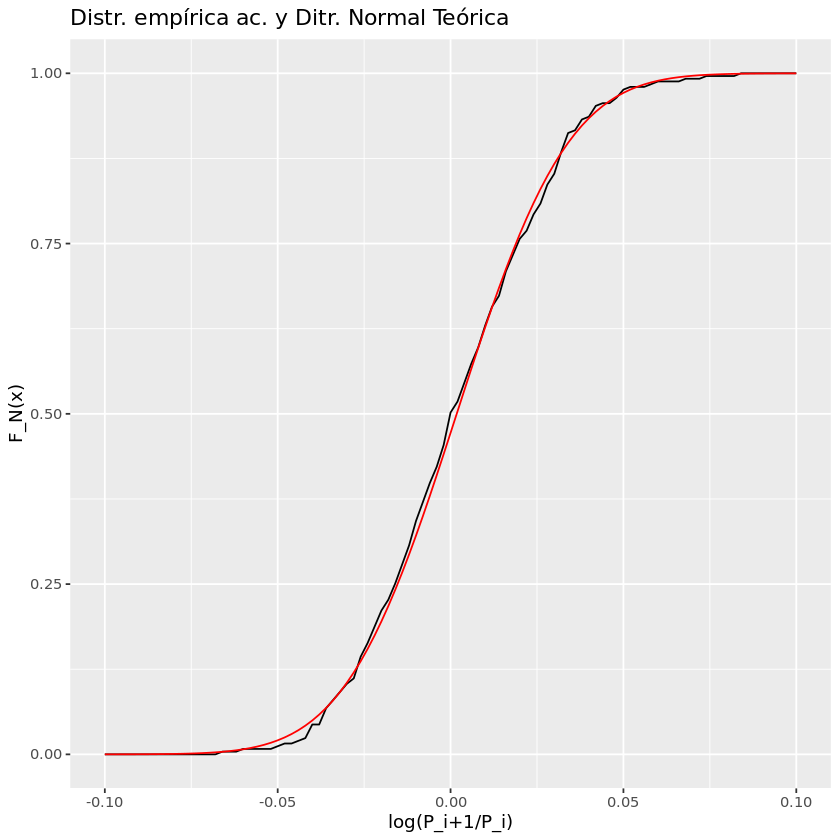

In [15]:
plotA2 = plotA + geom_function(fun=pnorm, args = list(mean = medA, sd = sd_A), color="red")
plotA2

In [16]:
plotB = ggplot(data.frame(logB),aes(logB))+geom_function(fun=ecdf(logB))+
         xlim(-0.1,0.1)+
         labs(x="log(P_i+1/P_i)",y="F_N(x)",
              title=paste0("Distr. empírica ac. y Ditr. Normal Teórica")) 

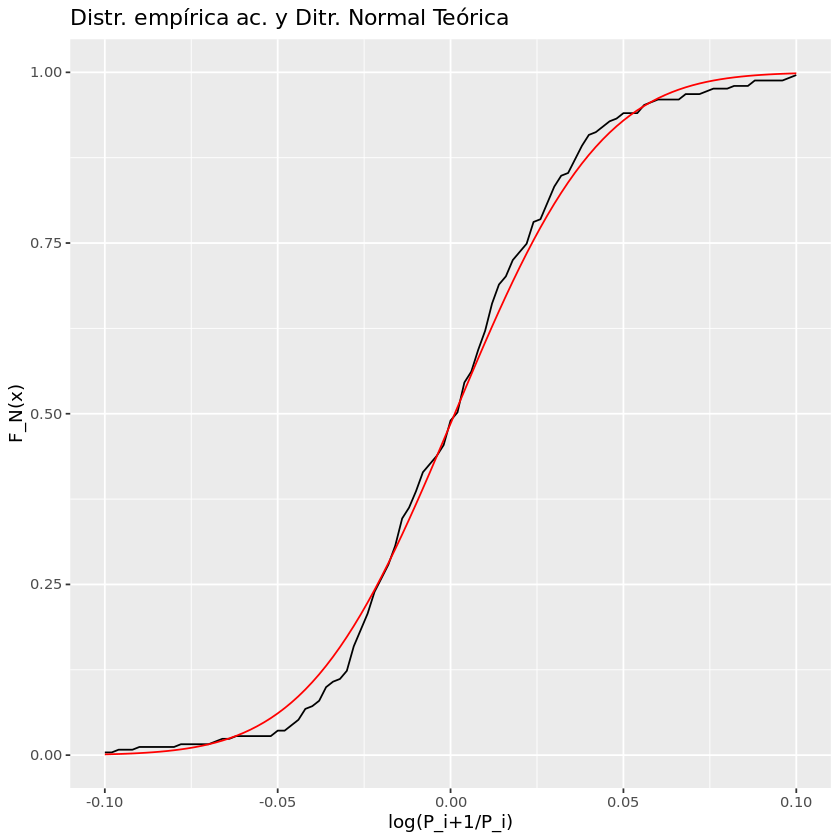

In [17]:
plotB2 = plotB + geom_function(fun=pnorm, args = list(mean = medB, sd = sd_B), color="red")
plotB2

In [18]:
plotC = ggplot(data.frame(logC),aes(logC))+geom_function(fun=ecdf(logC))+
         xlim(-0.1,0.1)+
         labs(x="log(P_i+1/P_i)",y="F_N(x)",
              title=paste0("Distr. empírica ac. y Ditr. Normal Teórica")) 

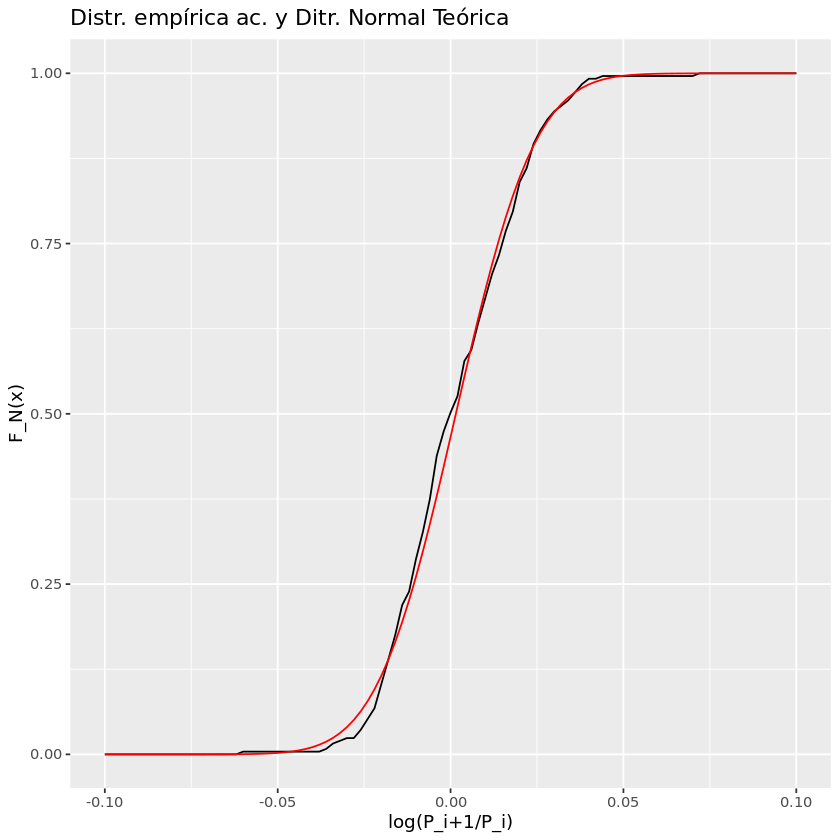

In [19]:
plotC2 = plotC + geom_function(fun=pnorm, args = list(mean = medC, sd = sd_C), color="red")
plotC2

In [20]:
plotD = ggplot(data.frame(logD),aes(logD))+geom_function(fun=ecdf(logD))+
         xlim(-0.1,0.1)+
         labs(x="log(P_i+1/P_i)",y="F_N(x)",
              title=paste0("Distr. empírica ac. y Ditr. Normal Teórica")) 

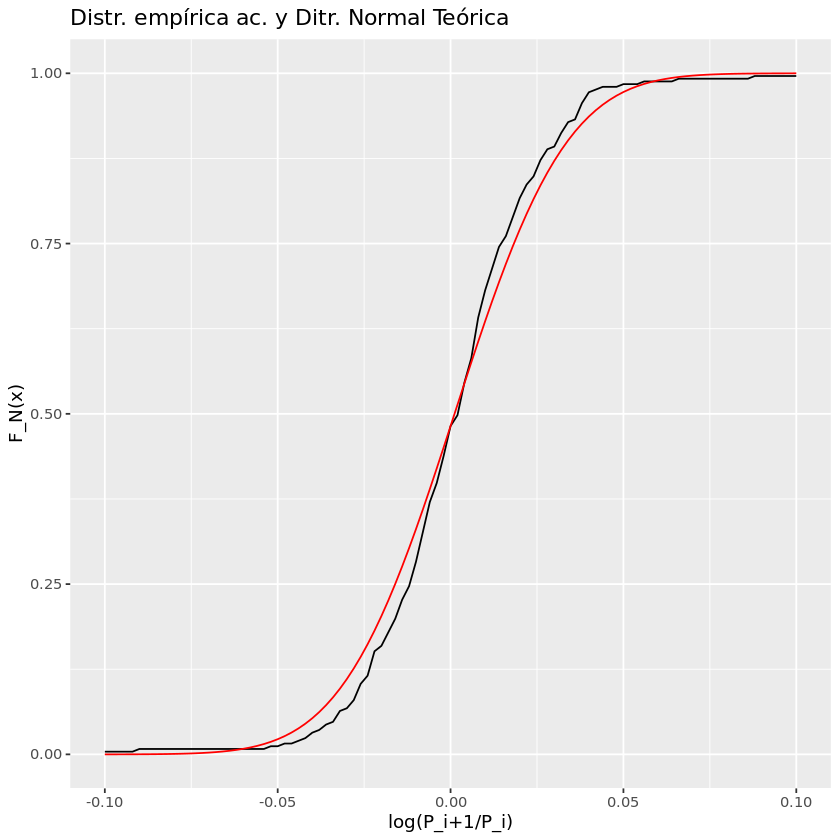

In [21]:
plotD2 = plotD + geom_function(fun=pnorm, args = list(mean = medD, sd = sd_D), color="red")
plotD2

### b) Porftafolio

In [22]:
#Se inicia con N=1000, luego se corregirá esta cantidad para cumplir el objetivo de Margen de error
set.seed(12345)
N = 1000
T = 180
P0A=46.57
P0B=52.89
P0C=125.53
P0D=94.1
rn_a=rnorm(N,0,1)
rn_b=rnorm(N,0,1)
rn_c=rnorm(N,0,1)
rn_d=rnorm(N,0,1)
log_cambio_A = (drift_A-sd_A^2/2)*T + sd_A*sqrt(T)*rnorm(N,0,1)
PTA = P0A*exp(log_cambio_A)
log_cambio_B = (drift_B-sd_B^2/2)*T + sd_B*sqrt(T)*rnorm(N,0,1)
PTB = P0B*exp(log_cambio_B)
log_cambio_C = (drift_C-sd_C^2/2)*T + sd_C*sqrt(T)*rnorm(N,0,1)
PTC = P0C*exp(log_cambio_C)
log_cambio_D = (drift_D-sd_D^2/2)*T + sd_D*sqrt(T)*rnorm(N,0,1)
PTD = P0D*exp(log_cambio_C)

Se define una nueva variable aleatoria que es el valor de Portafolio de acuerdo a lo siguiente:

In [23]:
Portafolio = 120*PTA+300*PTB+200*PTC+150*PTD

In [24]:
#valor esperado del portafolio
E_Portafolio = mean(Portafolio)
E_Portafolio

[1] 82938.39

In [25]:
N_Calc = (1.96*sd(Portafolio))^2/(0.01*E_Portafolio)^2
N_Calc

[1] 1578.651

partiendo con N=1000 (N inicial), se estima con un que se requiere de al menos 1600 muestras para tener un margen de error del 1% del valor estimado

In [27]:
set.seed(12345)
N = 1600
T = 180
P0A=46.57
P0B=52.89
P0C=125.53
P0D=94.1
#guardamos las muestras normales para utilizar en (d)
rn_a=rnorm(N,0,1)
rn_b=rnorm(N,0,1)
rn_c=rnorm(N,0,1)
rn_d=rnorm(N,0,1)
log_cambio_A = (drift_A-sd_A^2/2)*T + sd_A*sqrt(T)*rn_a
PTA = P0A*exp(log_cambio_A)
log_cambio_B = (drift_B-sd_B^2/2)*T + sd_B*sqrt(T)*rn_b
PTB = P0B*exp(log_cambio_B)
log_cambio_C = (drift_C-sd_C^2/2)*T + sd_C*sqrt(T)*rn_c
PTC = P0C*exp(log_cambio_C)
log_cambio_D = (drift_D-sd_D^2/2)*T + sd_D*sqrt(T)*rn_d
PTD = P0D*exp(log_cambio_C)

In [28]:
Portafolio_fin=120*PTA+300*PTB+200*PTC+150*PTD

In [29]:
E_Portafolio_fin = mean(Portafolio_fin)
E_Portafolio_fin

[1] 83013.41

In [30]:
#Margen de error menor 1% del valor esperado
Margen_Error = 1.96*sd(Portafolio_fin)/sqrt(N)
Margen_Error

[1] 777.2749

#### Ganancia Neta

In [71]:
r=0.03 #tasa de interés anual
Tanos=0.5 #(180 días, medio año)
Portafolio_0=120*46.57+300*52.89+200*125.53+150*94.1
Portafolio_0

[1] 60676.4

In [32]:
Portafolio_0

[1] 60676.4

In [72]:
GN_VP = Portafolio_fin*exp(-r*Tanos) - Portafolio_0

In [73]:
#Valor Presente del Valor Esperado Portafolio a 6 meses
mean(GN_VP)

[1] 21101.1

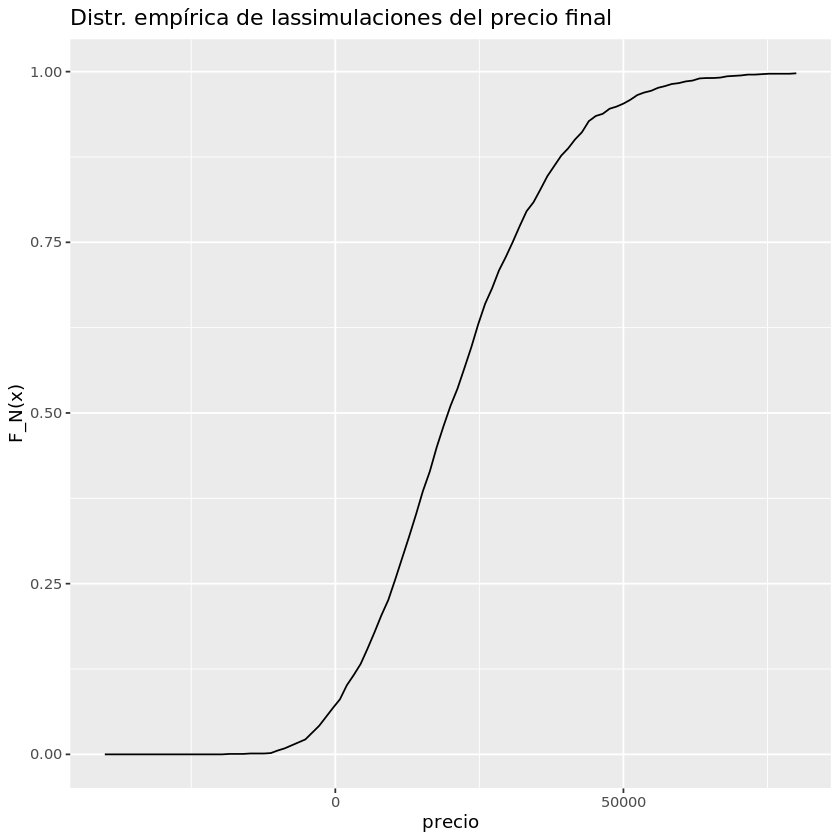

In [74]:
plot_port = ggplot(data.frame(GN_VP),aes(GN_VP))+geom_function(fun=ecdf(GN_VP))+
         xlim(-40000,80000)+
         labs(x="precio",y="F_N(x)",
              title=paste0("Distr. empírica de lassimulaciones del precio final")) 
plot_port

#### c) Matriz de Correlación (Precios de Acciones)

In [36]:
matrix_data = matrix(c(PTA, PTB, PTC, PTD), ncol = 4)

In [37]:
matrix_cor_precios = cor(matrix_data)
matrix_cor_precios

1.000000000,-0.01757066,-0.005297483,-0.005297483
-0.017570663,1.00000000,-0.050520489,-0.050520489
-0.005297483,-0.05052049,1.000000000,1.000000000
-0.005297483,-0.05052049,1.000000000,1.000000000


#### d) Matriz de Correlación (logaritmos de los ratios)

In [38]:
matrix_ratios = matrix(c(logA, logB, logC, logD), ncol = 4)

In [39]:
matrix_cor_ratios = cor(matrix_ratios, use = "complete.obs")
matrix_cor_ratios

1.0000000,0.2927874,0.5354339,0.3112515
0.2927874,1.0000000,0.2722732,0.4196191
0.5354339,0.2722732,1.0000000,0.3301906
0.3112515,0.4196191,0.3301906,1.0000000


#### e) Muestras de log-ratio

In [41]:
#Se genera la matriz de covarianzas
matriz_cov = cov(matrix_ratios, use = "complete.obs")
matriz_cov

0.0006434903,0.0002461644,0.0002445113,0.0002010373
0.0002461644,0.0010985091,0.0001624534,0.0003541207
0.0002445113,0.0001624534,0.0003240740,0.0001513495
0.0002010373,0.0003541207,0.0001513495,0.0006483185


In [42]:
cholesky = t(chol(matriz_cov))
cholesky

0.025367110,0.000000000,0.000000000,0.00000000
0.009704077,0.031691323,0.000000000,0.00000000
0.009638911,0.002174623,0.015047805,0.00000000
0.007925117,0.008747338,0.003717343,0.02225256


In [43]:
vector_medias = c(medA,medB,medC,medD)
vector_medias

[1] 0.001782691 0.001207631 0.001535589 0.001146991

In [44]:
matrix_muestras =c()
z=c()

In [45]:
for (i in 1:N){
    z=(vector_medias)+cholesky%*%c(rn_a[i],rn_b[i],rn_c[i],rn_d[i])
    matrix_muestras=rbind(matrix_muestras,t(z))
    }

In [46]:
med_muestras_A=mean(matrix_muestras[,1])
med_muestras_B=mean(matrix_muestras[,2])
med_muestras_C=mean(matrix_muestras[,3])
med_muestras_D=mean(matrix_muestras[,4])

In [47]:
sd_muestras_A=sd(matrix_muestras[,1])
sd_muestras_B=sd(matrix_muestras[,2])
sd_muestras_C=sd(matrix_muestras[,3])
sd_muestras_D=sd(matrix_muestras[,4])

In [111]:
drift_muestras_A= med_muestras_A+sd_muestras_A^2/2
drift_muestras_B= med_muestras_B+sd_muestras_B^2/2
drift_muestras_C= med_muestras_C+sd_muestras_C^2/2
drift_muestras_D= med_muestras_D+sd_muestras_D^2/2

In [112]:
#Volatilidad de las muestras generadas
sd_muestras_A
sd_muestras_B
sd_muestras_C
sd_muestras_D

[1] 0.02548045

[1] 0.0321043

[1] 0.01764392

[1] 0.02548796

In [113]:
drift_muestras_A
drift_muestras_B
drift_muestras_C
drift_muestras_D

[1] 0.00237791

[1] 0.0009344187

[1] 0.002040717

[1] 0.001107346

In [114]:
set.seed(12456)
N = 1600
T = 180
P0A=46.57
P0B=52.89
P0C=125.53
P0D=94.1
muestras_A = (drift_muestras_A-sd_muestras_A^2/2)*T + sd_muestras_A*sqrt(T)*rnorm(N,0,1)
PTA_muestras = P0A*exp(muestras_A)
muestras_B = (drift_muestras_B-sd_muestras_B^2/2)*T + sd_muestras_B*sqrt(T)*rnorm(N,0,1)
PTB_muestras = P0B*exp(muestras_B)
muestras_C = (drift_muestras_C-sd_muestras_C^2/2)*T + sd_muestras_C*sqrt(T)*rnorm(N,0,1)
PTC_muestras = P0C*exp(muestras_C)
muestras_D = (drift_muestras_D-sd_muestras_D^2/2)*T + sd_muestras_D*sqrt(T)*rnorm(N,0,1)
PTD_muestras = P0D*exp(muestras_C)

In [115]:
Portafolio_fin_muestras=120*PTA_muestras+300*PTB_muestras+200*PTC_muestras+150*PTD_muestras

In [116]:
E_Portafolio_fin_muestras = mean(Portafolio_fin_muestras)
E_Portafolio_fin_muestras

[1] 83898.36

In [117]:
Margen_Error_muestras = 1.96*sd(Portafolio_fin_muestras)/sqrt(N)
Margen_Error_muestras

[1] 796.3055

#### Ganancia Neta de las muestras generadas

In [121]:
#traemos a valor presente el valor del portafolio considerando capitalización continua
GN_VP_muestras = Portafolio_fin_muestras*exp(-r*Tanos) - Portafolio_0

In [119]:
#Valor Presente del Valor Esperado Portafolio a 6 meses basado en muestras generadas
mean(GN_VP_muestras)

[1] 21972.87

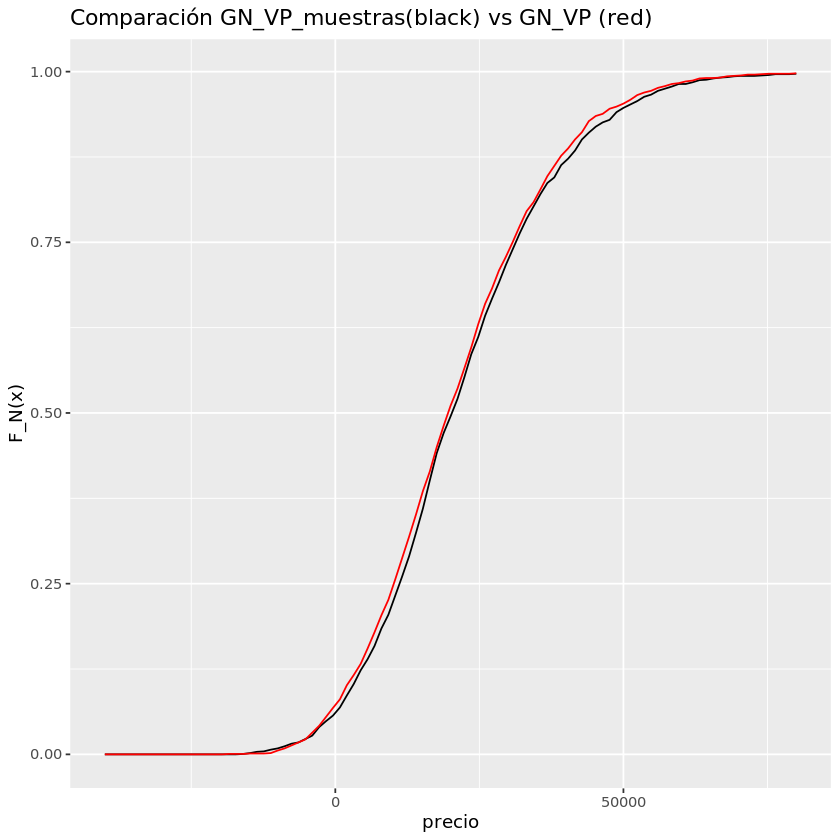

In [120]:
plot_port_muestras = ggplot(data.frame(GN_VP_muestras),aes(GN_VP_muestras))+geom_function(fun=ecdf(GN_VP_muestras))+geom_function(fun=ecdf(GN_VP), color="red")+
         xlim(-40000,80000)+
         labs(x="precio",y="F_N(x)",
              title=paste0("Comparación GN_VP_muestras(black) vs GN_VP (red)")) 
plot_port_muestras